In [1]:
pip install ortools matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 216.8 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 228.9 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.27.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Optimal solution found:
Cargo 0 -> Destination 0, Cost: 4
Cargo 1 -> Destination 2, Cost: 4
Cargo 2 -> Destination 1, Cost: 3
Total cost: 11


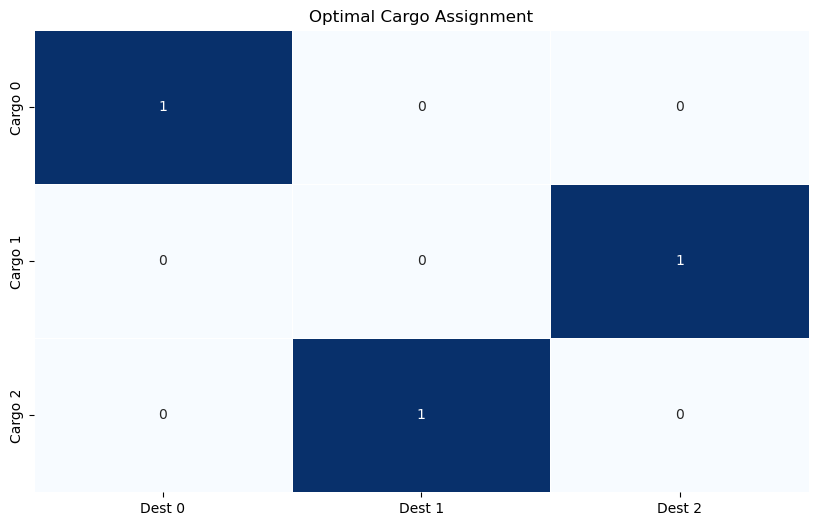

In [2]:
from ortools.linear_solver import pywraplp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def solve_transportation_problem():

    solver = pywraplp.Solver.CreateSolver('GLOP')

    
    num_sources = 3  
    num_destinations = 3  

   
    costs = [
        [4, 8, 8],
        [2, 6, 4],
        [5, 3, 7]
    ]

    
    x = {}
    for i in range(num_sources):
        for j in range(num_destinations):
            x[(i, j)] = solver.NumVar(0, solver.infinity(), f'x_{i}_{j}')


    for i in range(num_sources):
        solver.Add(sum(x[i, j] for j in range(num_destinations)) == 1)


    for j in range(num_destinations):
        solver.Add(sum(x[i, j] for i in range(num_sources)) == 1)

   
    solver.Minimize(solver.Sum(x[i, j] * costs[i][j] for i in range(num_sources) for j in range(num_destinations)))


    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Optimal solution found:')
        total_cost = 0
        for i in range(num_sources):
            for j in range(num_destinations):
                if x[i, j].solution_value() > 0:
                    print(f'Cargo {i} -> Destination {j}, Cost: {costs[i][j]}')
                    total_cost += costs[i][j]
        print(f'Total cost: {total_cost}')
        visualize_assignment(x, costs)
    else:
        print('No optimal solution found.')

def visualize_assignment(x, costs):
    assignment = np.zeros((len(costs), len(costs[0])))
    for (i, j), var in x.items():
        if var.solution_value() > 0:
            assignment[i][j] = 1

    df = pd.DataFrame(assignment, columns=[f'Dest {j}' for j in range(len(costs[0]))],
                      index=[f'Cargo {i}' for i in range(len(costs))])

    plt.figure(figsize=(10, 6))
    sns.heatmap(df, annot=True, cmap='Blues', cbar=False, linewidths=.5)
    plt.title('Optimal Cargo Assignment')
    plt.show()

solve_transportation_problem()